In [ ]:

%pip install scipy
%pip install matplotlib
%pip install numpy
%pip install tensorflow
%pip install PIL
%pip install opencv-python-headless




Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\hanib\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\hanib\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\hanib\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\hanib\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\hanib\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\hanib\AppData\Local\Programs\Python\Python311\Lib\site-packages\pi

  Obtaining dependency information for numpy<2.2.0,>=1.23.5 from https://files.pythonhosted.org/packages/1e/48/a9a4b538e28f854bfb62e1dea3c8fea12e90216a276c7777ae5345ff29a7/numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl (12.9 MB)



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import tempfile
import os

model = tf.keras.models.load_model("letter_recognition_model.h5")

In [10]:
from AiTextExtractorService import AiTextExtractorService

In [11]:
estrattore = AiTextExtractorService(model)

Model loaded successfully


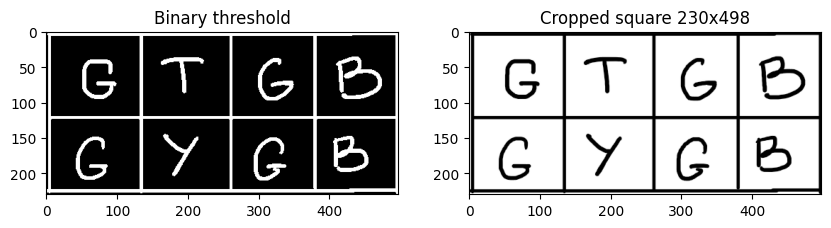

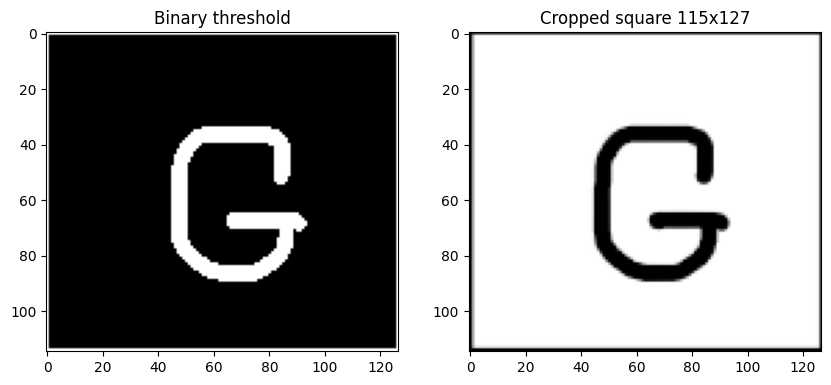

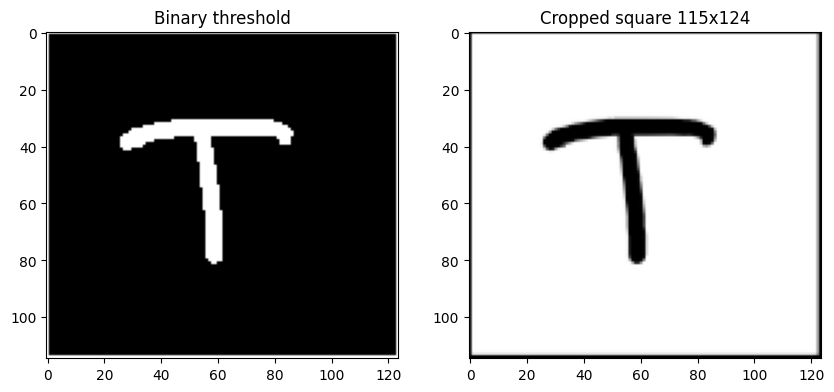

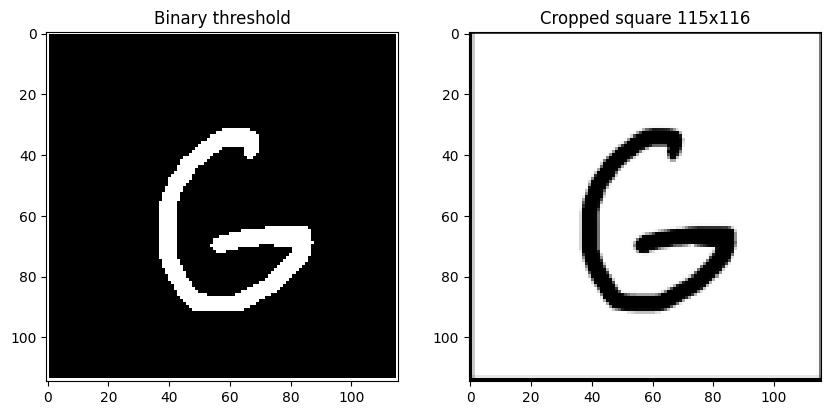

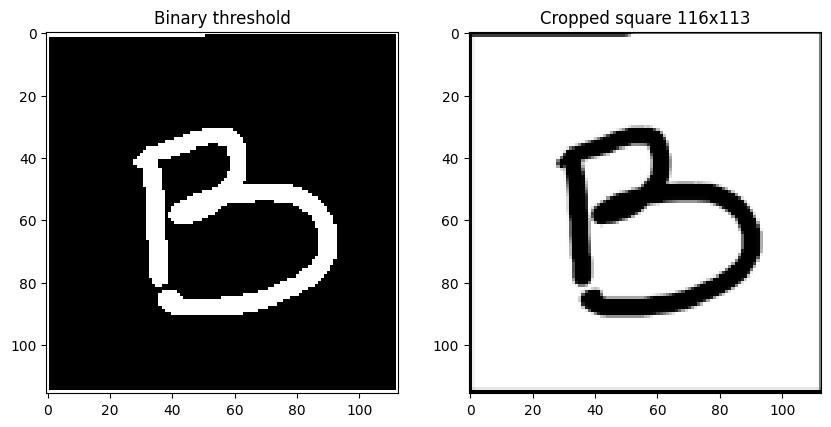

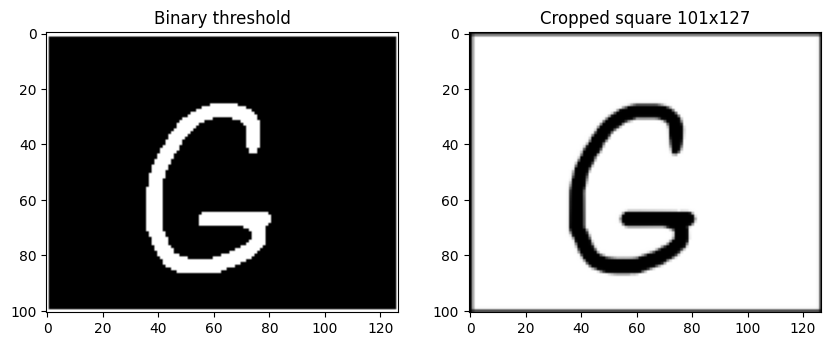

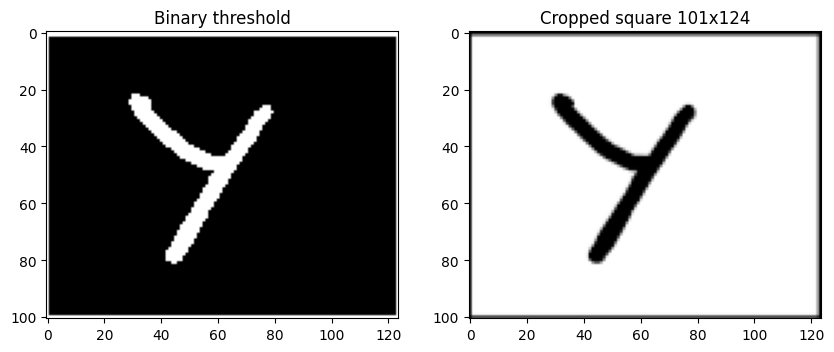

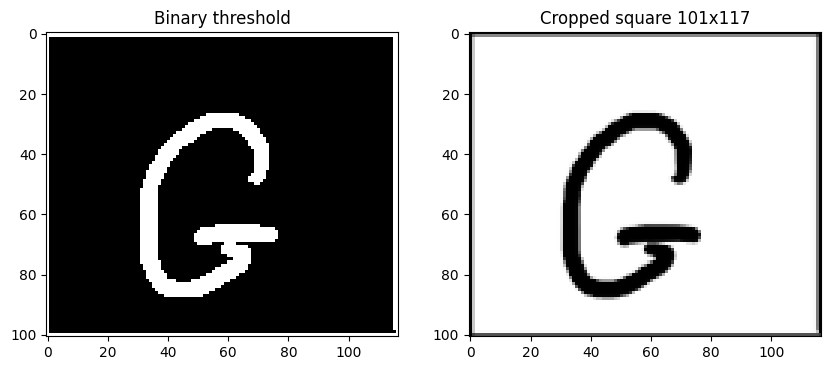

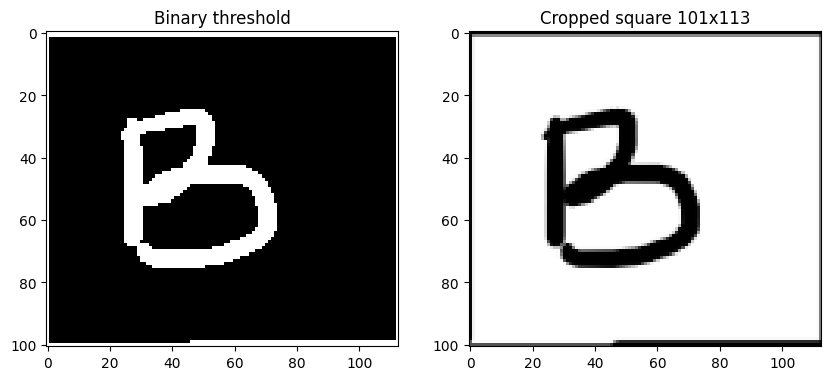

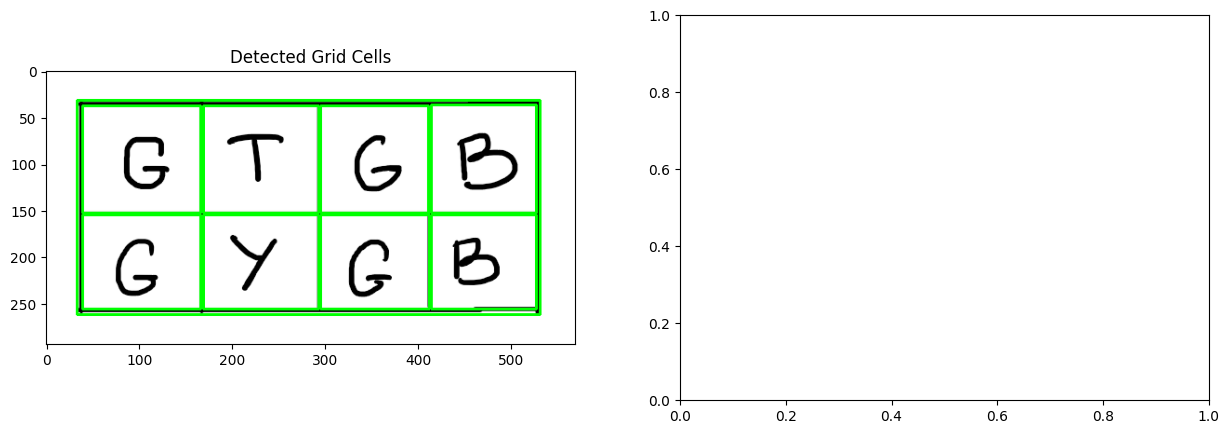

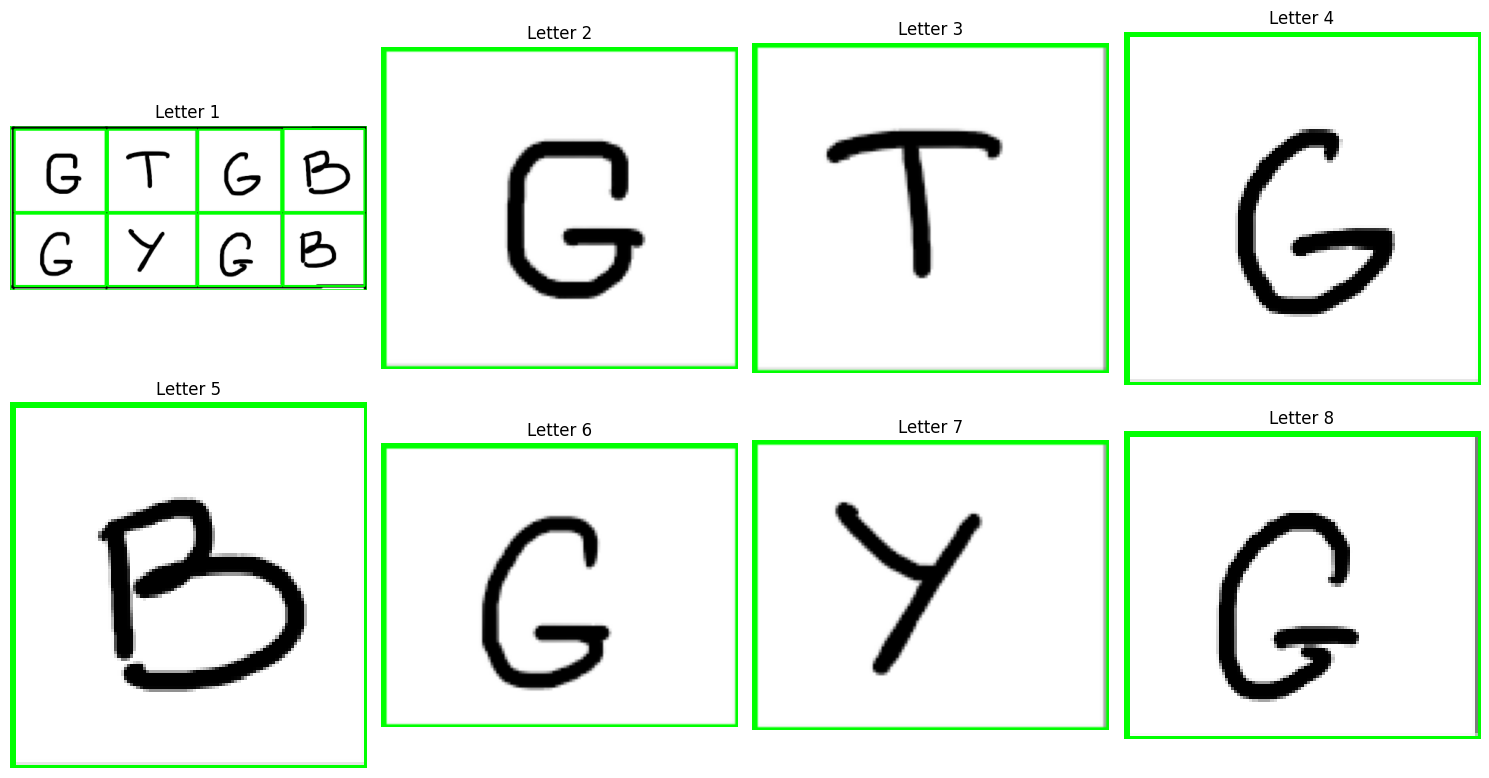

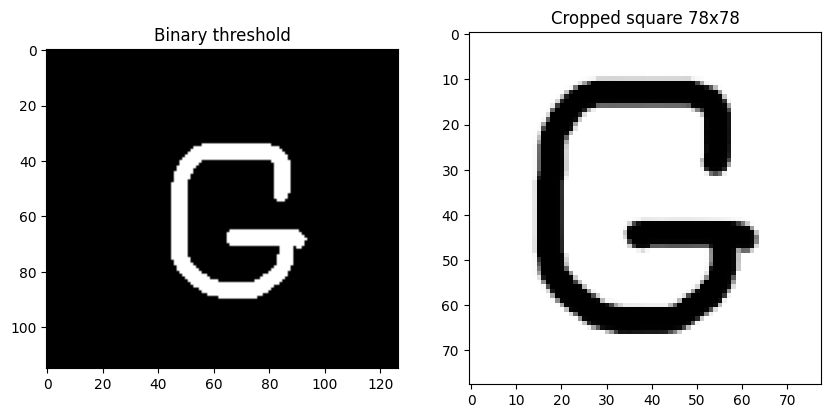

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
La classe predetta 6 corrisponde alla lettera: g


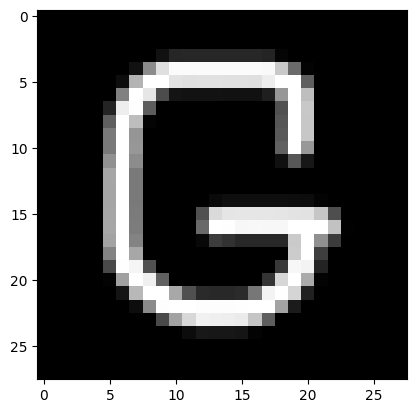

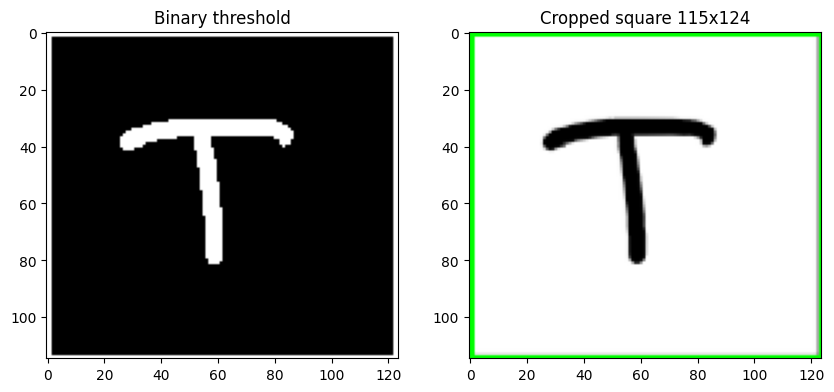

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
La classe predetta 19 corrisponde alla lettera: t


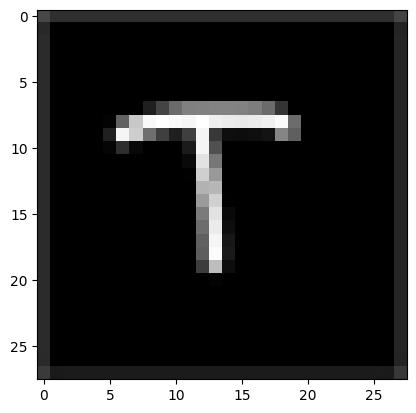

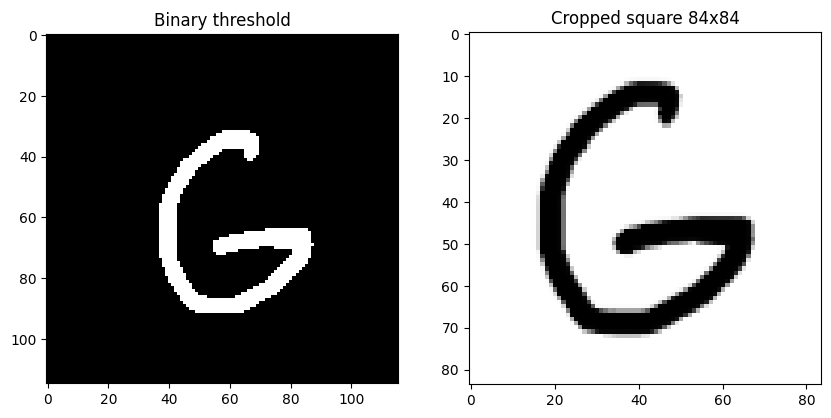

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
La classe predetta 6 corrisponde alla lettera: g


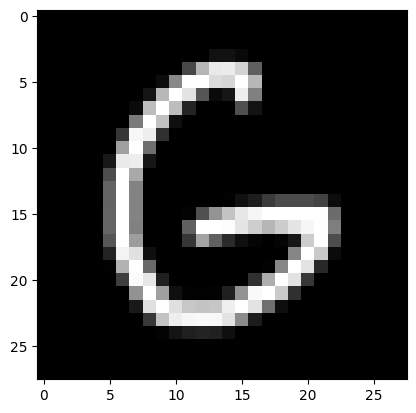

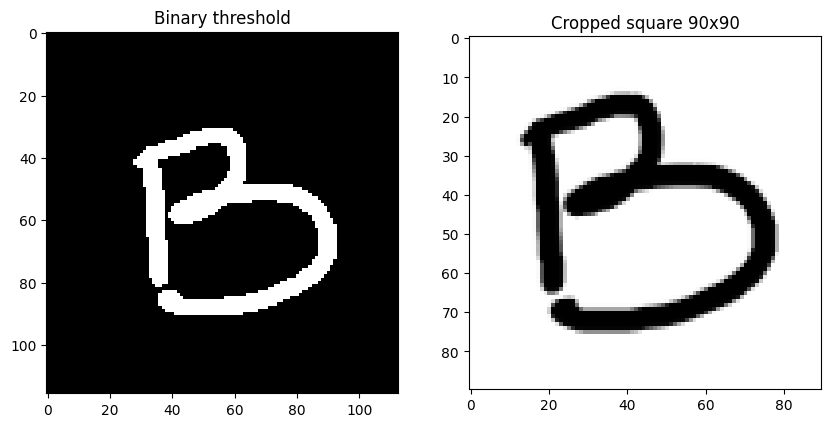

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
La classe predetta 1 corrisponde alla lettera: b


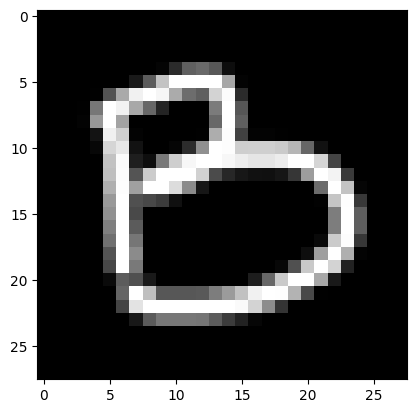

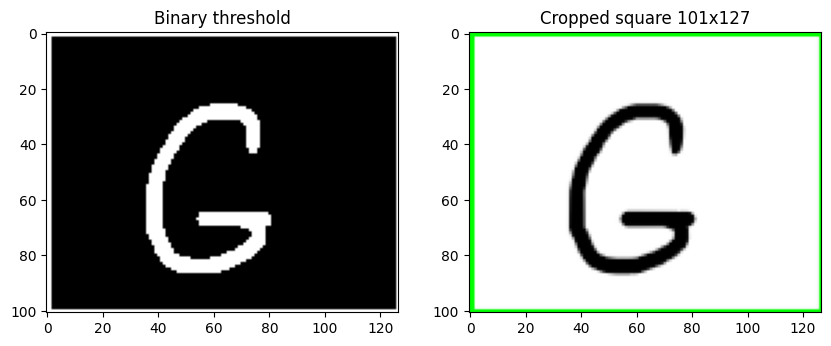

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
La classe predetta 6 corrisponde alla lettera: g


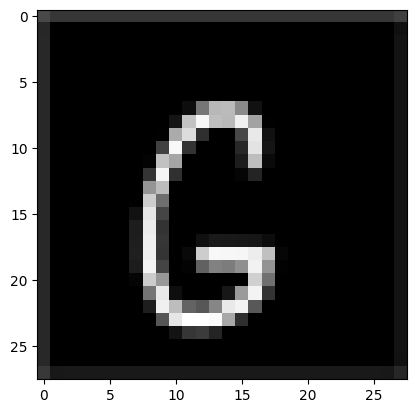

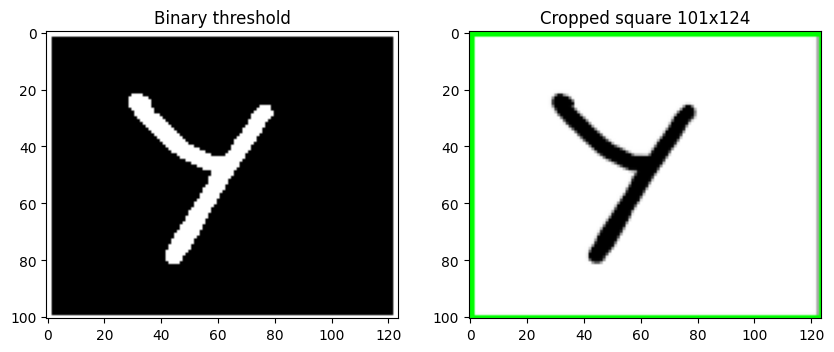

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
La classe predetta 24 corrisponde alla lettera: y


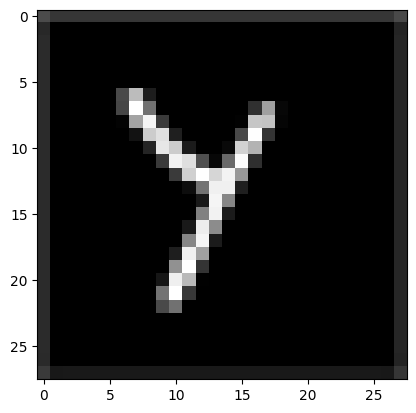

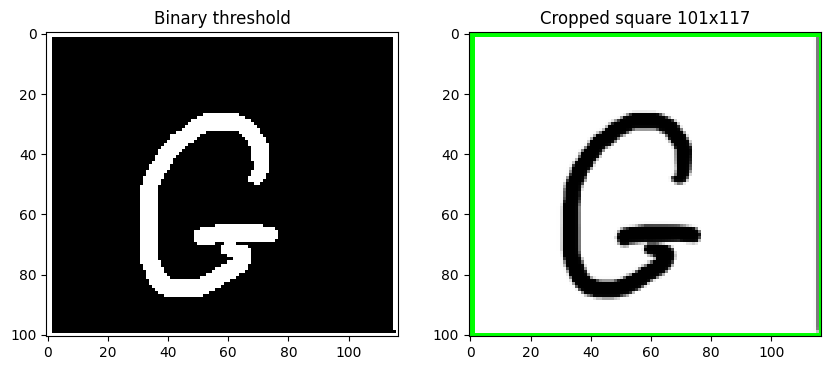

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
La classe predetta 6 corrisponde alla lettera: g


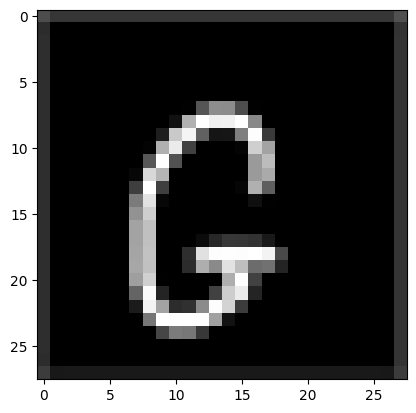

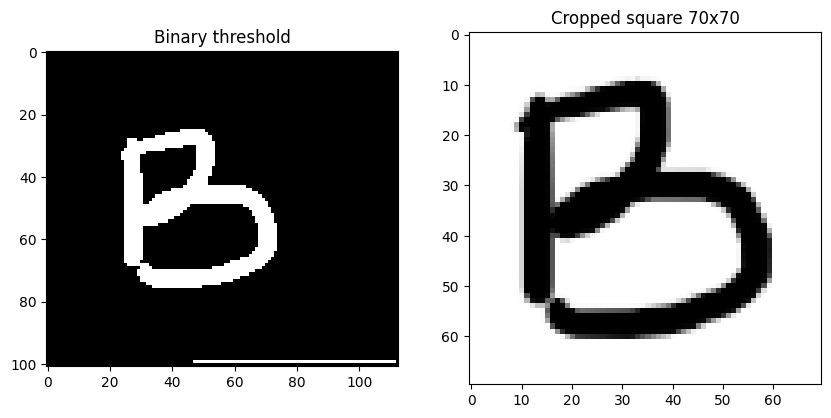

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
La classe predetta 1 corrisponde alla lettera: b
Predicted letters: ['g', 't', 'g', 'b', 'g', 'y', 'g', 'b']


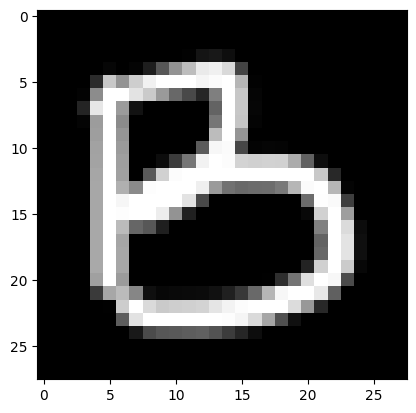

In [12]:
lettere = estrattore.runGridExtraction('costum-test/1.png')

In [13]:
print(lettere)

['g', 't', 'g', 'b', 'g', 'y', 'g', 'b']


In [ ]:
from PIL import Image
import cv2
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

class HandwrittenGridOCR:
    def __init__(self):
        self.image_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
        self.ocr_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
        self.recognized_grid = {}
        
    def process_grid_image(self, image_path):
        grid_image = cv2.imread(image_path)
        processed_image = self._preprocess_image(grid_image)
        cell_coordinates = self._detect_grid_cells(processed_image)
        self._recognize_cell_contents(grid_image, cell_coordinates)
        
    def _preprocess_image(self, image):
        grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return cv2.adaptiveThreshold(grayscale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    def _detect_grid_cells(self, binary_image):
        horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
        vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
        
        horizontal_lines = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
        vertical_lines = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
        
        grid_mask = cv2.addWeighted(horizontal_lines, 0.5, vertical_lines, 0.5, 0.0)
        contours, _ = cv2.findContours(grid_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        return sorted([cv2.boundingRect(cnt) for cnt in contours if cv2.contourArea(cnt) > 400], 
                     key=lambda b: (b[1], b[0]))
    
    def _recognize_cell_contents(self, original_image, cell_coordinates):
        for idx, (x, y, w, h) in enumerate(cell_coordinates):
            cell_image = original_image[y:y+h, x:x+w]
            cell_content = self._ocr_cell(cell_image)
            row = idx // 3
            col = idx % 3
            self.recognized_grid[(row, col)] = cell_content
            
    def _ocr_cell(self, cell_image):
        pil_image = Image.fromarray(cv2.cvtColor(cell_image, cv2.COLOR_BGR2RGB))
        inputs = self.image_processor(pil_image, return_tensors="pt").pixel_values
        outputs = self.ocr_model.generate(inputs)
        return self.image_processor.batch_decode(outputs, skip_special_tokens=True)[0].upper().strip()

class GridSearchEngine:
    def __init__(self, ocr_system):
        self.grid_data = ocr_system.recognized_grid
        
    def find_letter_positions(self, target_letter):
        return [pos for pos, letter in self.grid_data.items() if letter == target_letter.upper()]
    
    def get_sequence_matches(self, sequence):
        matches = []
        sequence = sequence.upper()
        
        # Horizontal search
        for row in range(3):
            row_text = ''.join([self.grid_data.get((row, col), '') for col in range(3)])
            if sequence in row_text:
                start_col = row_text.find(sequence)
                matches.append([(row, col) for col in range(start_col, start_col+len(sequence))])
                
        # Vertical search
        for col in range(3):
            col_text = ''.join([self.grid_data.get((row, col), '') for row in range(3)])
            if sequence in col_text:
                start_row = col_text.find(sequence)
                matches.append([(row, col) for row in range(start_row, start_row+len(sequence))])
                
        return matches
    
    def display_grid(self):
        print("\n  Current Recognized Grid:")
        for row in range(3):
            print(f"  Row {row}: {[self.grid_data.get((row, col), '?') for col in range(3)]}")

# Esempio di utilizzo
if __name__ == "__main__":
    # 1. Inizializzazione sistema
    ocr_system = HandwrittenGridOCR()
    
    # 2. Elaborazione immagine
    ocr_system.process_grid_image("C:\Users\hanib\OneDrive\Desktop\Progetto ai\Progetto ai\costum-test\R.jpg")
    
    # 3. Inizializzazione motore di ricerca
    search_engine = GridSearchEngine(ocr_system)
    search_engine.display_grid()
    
    # 4. Esempi di ricerca
    print("\nSearch Results:")
    print(f"Posizioni della lettera 'A': {search_engine.find_letter_positions('A')}")
    print(f"Sequenza 'ABC' trovata nelle posizioni: {search_engine.get_sequence_matches('ABC')}")


ModuleNotFoundError: No module named 'transformers'

implementazione di algoritmo di ricerca su la griglia estratta